# Description

It analyzes how clusters of traits were grouped across the ensemble partitions. For example, a stable cluster (obtained from consensus partitions) of cardiovascular diseases can show that all traits were always grouped together across all partitions of the ensemble; another cluster might show that some traits were clustered more often than others, representing a less stable group of traits.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name
import conf

# Settings

In [3]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering')

## Load data

In [4]:
INPUT_SUBSET = "umap"

In [5]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [6]:
DR_OPTIONS = {
    "n_components": 5,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [7]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0'

In [8]:
data_umap = pd.read_pickle(input_filepath)

In [9]:
data_umap.shape

(3752, 5)

In [10]:
data_umap.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
100001_raw-Food_weight,0.426554,0.670532,7.363805,1.171837,6.297295
100002_raw-Energy,-1.605179,0.815699,8.288521,0.990394,6.817351
100003_raw-Protein,-1.656178,0.788297,8.355906,1.017072,6.845651
100004_raw-Fat,-1.508325,0.802536,8.328274,1.033939,6.709319
100005_raw-Carbohydrate,-1.617872,0.812711,8.307973,1.020575,6.825944


# Load best partitions

In [11]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [12]:
best_partitions = pd.read_pickle(input_file)

In [13]:
best_partitions.shape

(59, 4)

In [14]:
best_partitions.head()

,method,partition,ari_median,selected
k,,,,
14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090117,True
22,scc_020,"[13, 18, 18, 18, 18, 18, 18, 18, 18, 13, 18, 1...",0.090100,True
13,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089920,True
12,scc_025,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...",0.089870,True
11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089616,True


# Load coassociation matrix

In [15]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "ensemble_coassoc_matrix.npy").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/ensemble_coassoc_matrix.npy')

In [16]:
coassoc_matrix = np.load(input_file)

In [17]:
coassoc_matrix = pd.DataFrame(
    data=1.0 - coassoc_matrix,
    index=data_umap.index.copy(),
    columns=data_umap.index.copy(),
)

In [18]:
coassoc_matrix.shape

(3752, 3752)

In [19]:
coassoc_matrix.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
100001_raw-Food_weight,1.000000,0.685029,0.672000,0.632457,0.658743,0.630653,0.638049,0.645876,0.669561,0.635147,...,0.538899,0.556839,0.559383,0.557392,0.513697,0.640706,0.569559,0.520489,0.588583,0.355667
100002_raw-Energy,0.685029,1.000000,0.958466,0.923323,0.950936,0.921023,0.907238,0.931522,0.933562,0.370802,...,0.321216,0.316138,0.338208,0.313555,0.314612,0.383843,0.329325,0.321314,0.351395,0.325040
100003_raw-Protein,0.672000,0.958466,1.000000,0.897535,0.941579,0.895229,0.882959,0.909610,0.925799,0.360978,...,0.321674,0.311801,0.326554,0.313784,0.329452,0.385440,0.335338,0.335920,0.357796,0.322986
100004_raw-Fat,0.632457,0.923323,0.897535,1.000000,0.947969,0.994750,0.950985,0.970326,0.892237,0.396162,...,0.347051,0.354029,0.372486,0.345276,0.351142,0.332497,0.288622,0.347786,0.307727,0.353344
100005_raw-Carbohydrate,0.658743,0.950936,0.941579,0.947969,1.000000,0.944990,0.929684,0.963707,0.902511,0.387937,...,0.338134,0.331888,0.357861,0.332953,0.334475,0.353035,0.298797,0.340712,0.320759,0.346953


The coassociation matrix shows the percentage of times a pair of traits was clustered together across the ensemble partitions.

## Stats

Here I show some general stats of the coassociation matrix, useful to compare results below. For instance, if a pair of traits got clustered together 61% of the times, how strong is that?

In [20]:
df = coassoc_matrix.where(np.triu(np.ones(coassoc_matrix.shape)).astype(np.bool))
df = df.stack().reset_index()

coassoc_matrix_stats = df[0].describe(
    percentiles=[0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]
)

[2021-05-08 18:58:48,002 - numexpr.utils] INFO: NumExpr defaulting to 4 threads.


In [21]:
coassoc_matrix_stats.apply(str)

count               7040628.0
mean        0.440934430329265
std       0.11635773410278555
min      0.028301886792452824
25%       0.39093997734994335
50%        0.4722727272727273
75%        0.5026083012020867
80%        0.5106334841628959
90%        0.5385138196647032
95%        0.5824800910125143
99%        0.6928119349005425
max                       1.0
Name: 0, dtype: object

On average, a pair of clusters appear together in 45% of the clusters in the ensemble (the median is 48%). That makes sense, since for some partitions the resolution (number of clusters) might not be enough to get smaller clusters.

# Plot coassociation values

## Functions

In [22]:
from IPython.display import HTML

In [23]:
def plot_cluster(data, partition, cluster_number, figsize=None):
    k = np.unique(partition).shape[0]

    display(HTML(f"<h3>Cluster {k}.{cluster_number}</h3>"))

    k_traits = data.loc[partition == cluster_number].index

    with sns.plotting_context("paper"):
        f, ax = plt.subplots(figsize=figsize)  # (figsize=(8, 8))

        display(
            sns.heatmap(
                data=coassoc_matrix.loc[k_traits, k_traits],
                vmin=coassoc_matrix_stats["50%"],
                vmax=1.0,
                annot=True,
                fmt=".2f",
                square=True,
            )
        )

In [24]:
k = 26
display(HTML(f"<h2>k: {k}</h2>"))
display(best_partitions.loc[k])

part = best_partitions.loc[k, "partition"]
part_stats = pd.Series(part).value_counts()
display(part_stats)

method                                                  scc_020
partition     [0, 21, 21, 21, 21, 21, 21, 21, 21, 0, 21, 21,...
ari_median                                            0.0869427
selected                                                   True
Name: 26, dtype: object

0     3318
25     147
24     101
18      18
17      17
13      15
21      15
14      14
16      13
12      12
15      10
19       9
6        8
11       8
5        7
7        6
10       5
4        5
1        4
3        4
2        4
20       3
9        3
8        3
23       2
22       1
dtype: int64

<AxesSubplot:>

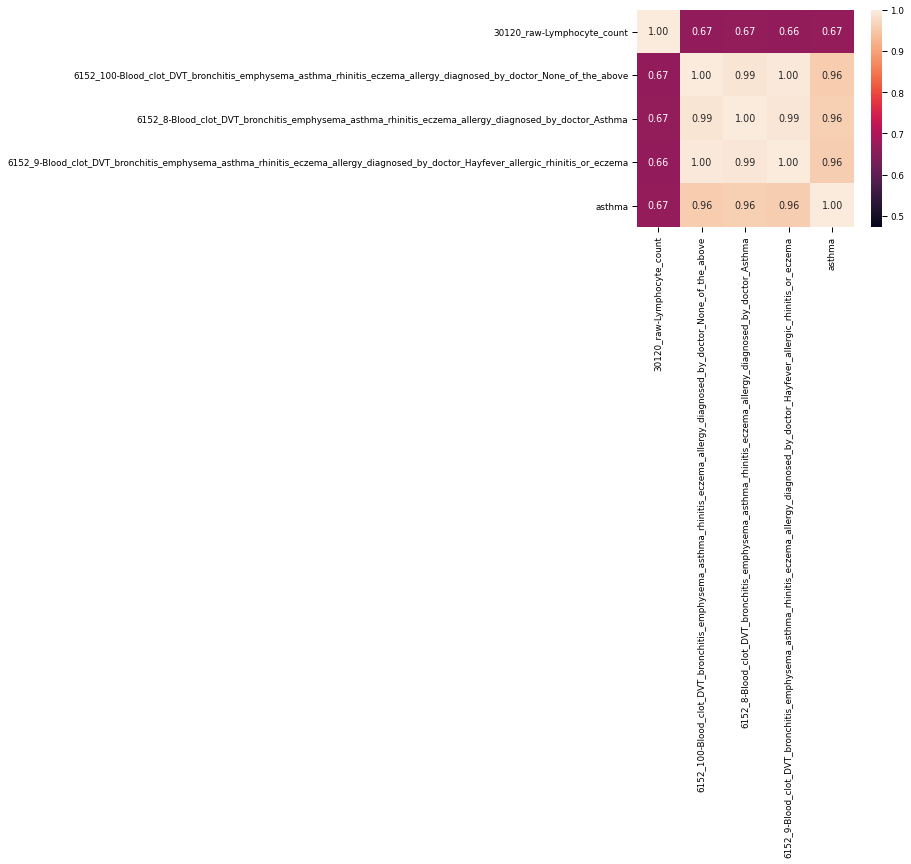

In [25]:
plot_cluster(data_umap, part, 10)

The plot above shows that these 8 keratometry measurements (such as 3mm weak meridian left) were always clustered together in all partitions of the ensemble, representing a very strong/stable grouping.

<AxesSubplot:>

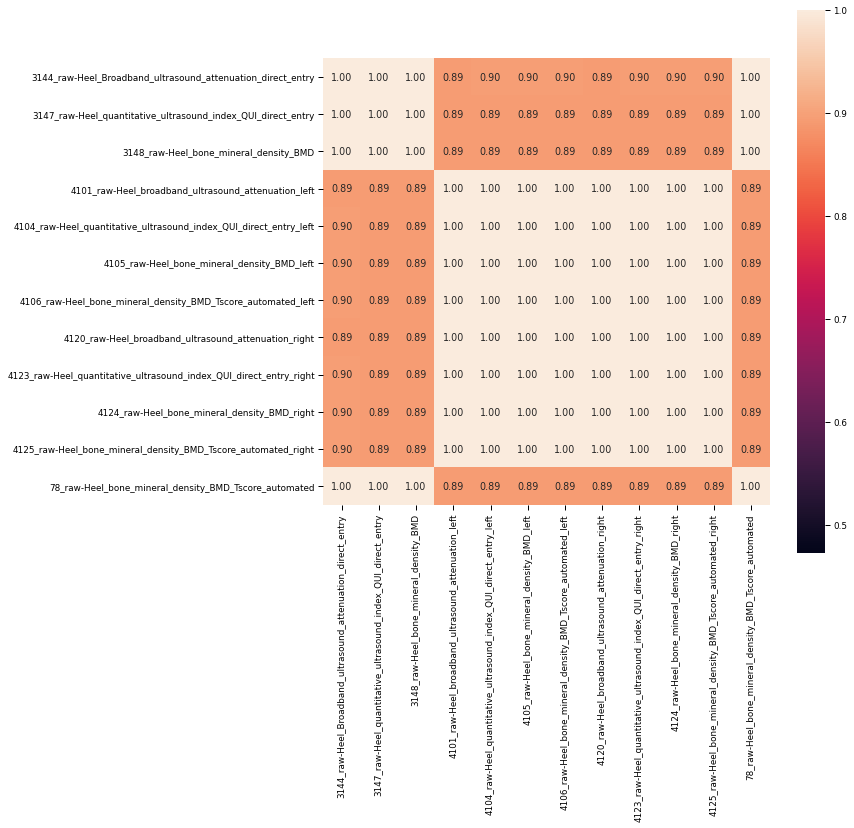

In [26]:
plot_cluster(data_umap, part, 12, figsize=(10, 10))

The "heel bone mineral density" cluster is not as strong as the keratometry one, since some trait pairs have a coassociation value of 0.89. However, 0.89 is quite higher than the 99 percentile of the coassociation values (which is 0.69).